In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
def load_and_resize_images(image_paths, size=(64, 64)):
    resized_images = []
    for path in image_paths:
        # Load image
        image = cv2.imread(path)
        # Resize image
        resized_image = cv2.resize(image, size)
        # Append resized image to list
        resized_images.append(resized_image)
    return resized_images

In [ ]:
# Step1: Randomly choose k data points as initial centroids
def initialize_centroids(X, k):
    centroids_indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[centroids_indices]
    return centroids

In [ ]:
# Step2: Assign each data point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    cluster_labels = np.argmin(distances, axis=0)
    return cluster_labels

In [ ]:
# Step3: Update centroids as the mean of data points in each cluster
def update_centroids(X, cluster_labels, k):
    centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(k)])
    return centroids

In [ ]:
# Step4: Apply the Kmeans Clustering
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        prev_centroids = centroids.copy()
        cluster_labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, cluster_labels, k)
        if np.allclose(prev_centroids, centroids):
            break
    return cluster_labels, centroids

In [ ]:
def display_clustered_image(image, cluster_labels):
    num_clusters = len(np.unique(cluster_labels))
    clustered_image = np.zeros_like(image)
    cluster_labels = cluster_labels.reshape(image.shape[:2])  # Reshape cluster_labels to match image dimensions
    for i in range(num_clusters):
        clustered_image[cluster_labels == i] = np.mean(image[cluster_labels == i], axis=0)
    return clustered_image

In [ ]:
# Compute silhouette score
def compute_silhouette_score(features, cluster_labels):
    silhouette_avg = silhouette_score(features, cluster_labels)
    return silhouette_avg

In [ ]:
# Load and resize images
image_paths = ["/content/drive/MyDrive/cvasg2/image1.jpg", "/content/drive/MyDrive/cvasg2/image2.jpg"]
resized_images = load_and_resize_images(image_paths)

In [ ]:
# Number of clusters
num_clusters_list = [3, 6]

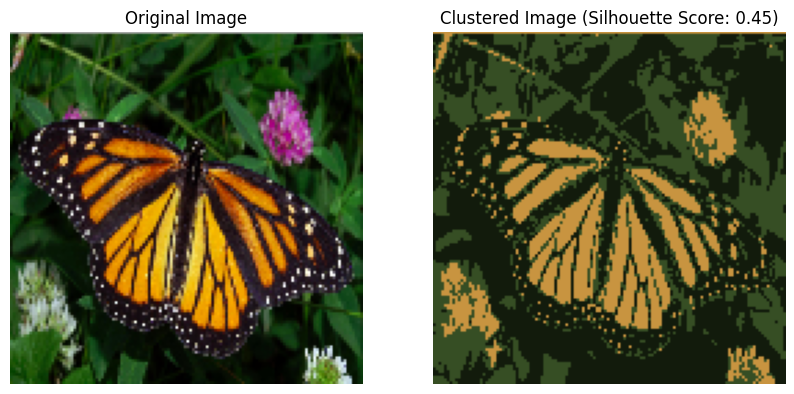

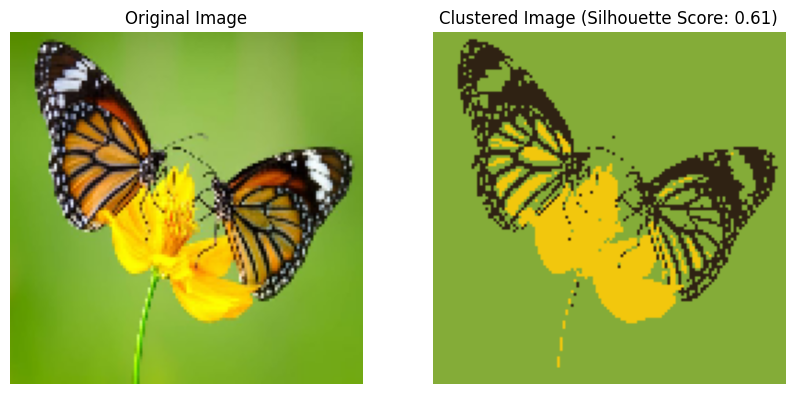

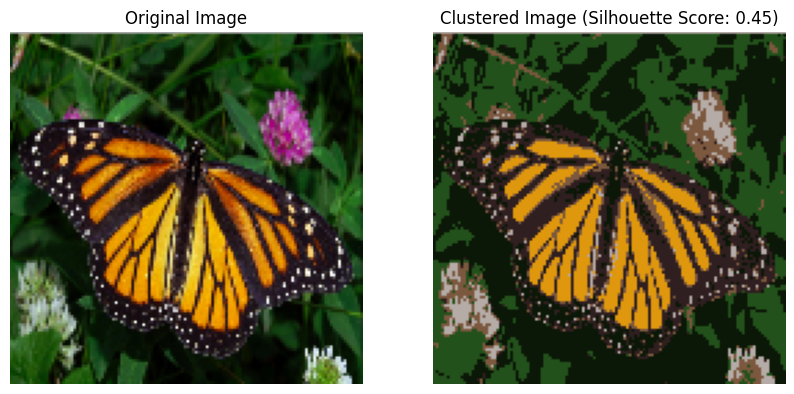

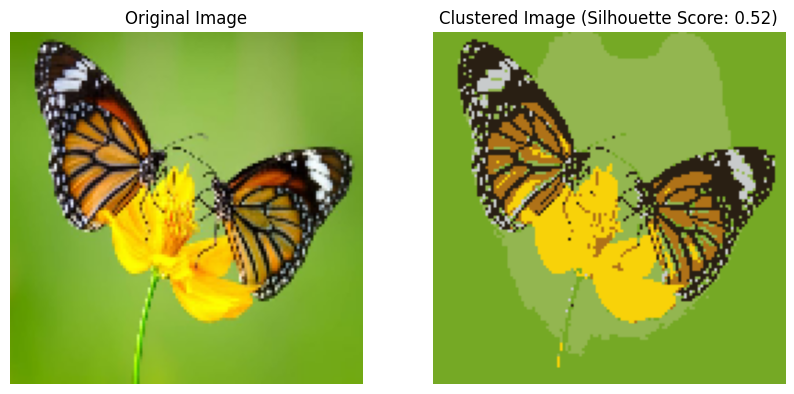

In [ ]:
# Cluster and display images
for num_clusters in num_clusters_list:
  for i, image in enumerate(resized_images):
      features = image.reshape((-1, 3)).astype(np.float32)
      cluster_labels, _ = kmeans(features, num_clusters)
      clustered_image = display_clustered_image(image, cluster_labels)

      # Compute silhouette score
      features = image.reshape((-1, 3)).astype(np.float32)
      silhouette_avg = compute_silhouette_score(features, cluster_labels)

      # Display original and clustered images side by side
      fig, axes = plt.subplots(1, 2, figsize=(10, 5))

      axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      axes[0].set_title('Original Image')
      axes[0].axis('off')

      axes[1].imshow(cv2.cvtColor(clustered_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
      axes[1].set_title(f'Clustered Image (Silhouette Score: {silhouette_avg:.2f})')
      axes[1].axis('off')

      plt.show()